In [34]:
# all relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [35]:
path1 = "../Data/features_30_sec.csv"
dataset = pd.read_csv(path1)


In [36]:
header_row = dataset.columns.tolist()
print(header_row)

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [37]:
import pandas as pd

# Extract the MFCC feature columns
mfcc_columns = ['mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

mfcc_features = dataset[mfcc_columns]

# Print the MFCC features
print(mfcc_features)

     mfcc1_mean     mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var   
0   -113.570648   2564.207520  121.571793  295.913818  -19.168142  235.574432  \
1   -207.501694   7764.555176  123.991264  560.259949    8.955127  572.810913   
2    -90.722595   3319.044922  140.446304  508.765045  -29.093889  411.781219   
3   -199.544205   5507.517090  150.090897  456.505402    5.662678  257.161163   
4   -160.337708   5195.291992  126.219635  853.784729  -35.587811  333.792938   
..          ...           ...         ...         ...         ...         ...   
995 -153.640961   2540.949463  109.864647  455.579956  -23.065695  189.883865   
996 -142.392029   3282.358887  116.189629  345.518890  -32.147167  191.464813   
997 -124.952271   1681.638794  115.177155  475.088074  -47.975151  290.302795   
998 -225.007751  10766.367188  123.646751  492.819122   -9.724174  605.487488   
999 -235.161972   7712.194336  123.870110  798.665283  -22.538395  518.708618   

     mfcc4_mean   mfcc4_var

In [38]:
# Split the dataset into features and labels
columns = ['filename','label']
features = dataset.drop(columns=columns, axis=1)  # Drop the 'label' column
labels = dataset['label']

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [40]:
# Initialize a scaler object
scaler = StandardScaler()

# Fit the scaler on the training features and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [41]:
# Reshape the features to a 3D array [samples, timesteps, features]
# Assuming your features have shape (num_samples, num_features)
num_timesteps = 1  # Adjust the number of timesteps based on your requirements
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], num_timesteps, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], num_timesteps, X_test_scaled.shape[1]))

In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform the same label encoding on the testing labels
y_test_encoded = label_encoder.transform(y_test)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(num_timesteps, X_train_reshaped.shape[2])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(labels.unique()), activation='softmax'))  # Adjust the output units based on the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 3s 3ms/step - loss: 2.1914 - accuracy: 0.3013
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 1.8964 - accuracy: 0.4350
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 1.6082 - accuracy: 0.4538
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 1.3681 - accuracy: 0.5337
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 1.1775 - accuracy: 0.5900
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 1.0205 - accuracy: 0.6825
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.9021 - accuracy: 0.7050
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.7970 - accuracy: 0.7475
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.7738
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.7950


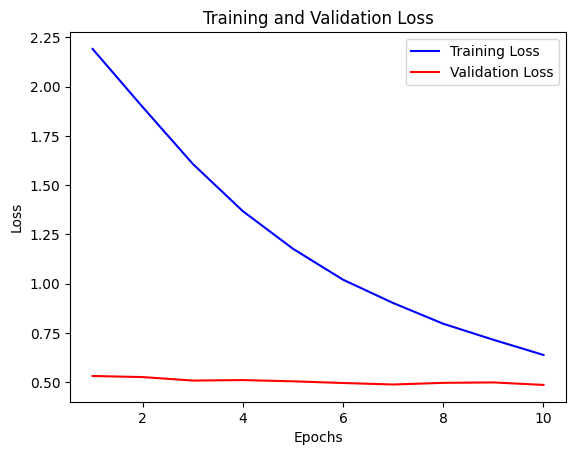

In [45]:
import matplotlib.pyplot as plt

# Extract the training and testing loss values from the history
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
model.save('rnn_model1.h5')

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test accuracy: {test_acc}')


7/7 [==============================] - 1s 2ms/step - loss: 1.0344 - accuracy: 0.6450
Test accuracy: 0.6449999809265137
